In [153]:
import numpy as np
import pandas as pd 
import re
import matplotlib.pyplot as plt
import random
%matplotlib inline
from preprocess_module import fraud_preprocessor 
iptrain_df, iptest_df, optrain_df, optest_df, benetrain_df, benetest_df, label_train_df, label_test_df = fraud_preprocessor(1)

In [154]:
import networkx as nx


In [155]:
ipoptrain = pd.concat([iptrain_df,optrain_df])
ipoptrain = ipoptrain.reset_index()

In [156]:
providerdf = ipoptrain[['Provider','AttendingPhysician']]
providerdf

,Provider,AttendingPhysician
0,PRV55912,PHY390922
1,PRV55907,PHY318495
2,PRV56046,PHY372395
3,PRV52405,PHY369659
4,PRV56614,PHY379376
...,...,...
558206,PRV53699,PHY364188
558207,PRV53702,PHY423019
558208,PRV53676,PHY361063
558209,PRV53689,PHY403198


In [157]:
# how many providers listing 'None' as AttendingPhysician?
providerdf.AttendingPhysician[providerdf.AttendingPhysician=='None'].count()

1508

In [158]:
networkdf = label_train_df 
networkdf['Color'] = ['blue' if x==0 else 'red' for x in label_train_df.PotentialFraud]
#networkdf['Label'] = label_train_df.index
networkdf.head(10)

,Provider,PotentialFraud,Color
0,PRV51001,0,blue
1,PRV51003,1,red
2,PRV51004,0,blue
3,PRV51005,1,red
4,PRV51007,0,blue
5,PRV51008,0,blue
6,PRV51011,0,blue
7,PRV51012,0,blue
8,PRV51013,0,blue
9,PRV51014,0,blue


In [ ]:



#Create physiciandf containing 2 columns: 1 for physician id and 1 for the providers sharing that physician

In [ ]:
#physiciandf = pd.DataFrame({'Physician':providerdf.AttendingPhysician.unique()})

In [ ]:
#physiciandf['ConnectedPrvd'] = ''

In [ ]:
#physiciandf['ConnectedPrvd'] = physiciandf['ConnectedPrvd'].astype('object')

In [ ]:
#for ind, physician in enumerate(list(physiciandf.Physician)):
#    physiciandf.at[ind, 'ConnectedPrvd'] = list(providerdf.loc[providerdf.AttendingPhysician==physician, 'Provider'])

In [ ]:
# save to csv so that dont have to call the above again
#physiciandf.to_csv('physiciandf.csv',index=False)

In [159]:
# physiciandf contains 2 columns: Physician and Providers who share the physician
physiciandf = pd.read_csv('physiciandf')
physiciandf['ConnectedPrvd'] = physiciandf.ConnectedPrvd.apply(lambda x: x[2:-2].split(r"', '"))
physiciandf = physiciandf.drop(135)
physiciandf.reset_index(drop=True, inplace=True)


import networkx as nx
PNet = nx.Graph()
maxlen = 1 

ldf = physiciandf.shape[0]

for ind in range(ldf):
    phys_set = set(physiciandf.ConnectedPrvd[ind])
    phys_list = list(phys_set)
    L_array = len(phys_list)
  
        
    if L_array<2:
        continue
    else:
        for i in range(L_array):
            for j in range(i+1,L_array):
                PNet.add_edge(phys_list[i],phys_list[j])
nodecolor = []
for node in nx.nodes(PNet):
    fraud = networkdf.loc[networkdf['Provider']==node,'PotentialFraud'].values[0]
    if (fraud==0): 
        nodecolor.append('blue')
    else:
        nodecolor.append('red')


In [160]:
networkdf

,Provider,PotentialFraud,Color
0,PRV51001,0,blue
1,PRV51003,1,red
2,PRV51004,0,blue
3,PRV51005,1,red
4,PRV51007,0,blue
...,...,...,...
5405,PRV57759,0,blue
5406,PRV57760,0,blue
5407,PRV57761,0,blue
5408,PRV57762,0,blue


In [161]:
#generate network of nodes with degree>10
connectednodes = []
for node in nx.nodes(PNet):
    if nx.degree(PNet,node)>6:
        connectednodes.append(node)
    else:
        continue
connectednodes

['PRV55165',
 'PRV57548',
 'PRV55510',
 'PRV53269',
 'PRV53242',
 'PRV52019',
 'PRV52065',
 'PRV55690',
 'PRV51356',
 'PRV51012',
 'PRV56469',
 'PRV56458',
 'PRV51146',
 'PRV55175',
 'PRV55243',
 'PRV55169',
 'PRV54381',
 'PRV55676',
 'PRV54910',
 'PRV53239',
 'PRV57208',
 'PRV56481',
 'PRV56454',
 'PRV52303',
 'PRV53142',
 'PRV53120',
 'PRV56235',
 'PRV57209',
 'PRV51064',
 'PRV57101',
 'PRV53706',
 'PRV52045',
 'PRV52165',
 'PRV55205',
 'PRV56015',
 'PRV54564',
 'PRV54949',
 'PRV54230',
 'PRV55230',
 'PRV52002',
 'PRV54382',
 'PRV54337',
 'PRV56587',
 'PRV54391',
 'PRV55232',
 'PRV57501',
 'PRV51598',
 'PRV54514',
 'PRV52308',
 'PRV51089',
 'PRV51148',
 'PRV55192',
 'PRV54580',
 'PRV54565',
 'PRV56350',
 'PRV55229',
 'PRV55215',
 'PRV54992',
 'PRV55920',
 'PRV55957',
 'PRV54559',
 'PRV56243',
 'PRV53405',
 'PRV55986',
 'PRV57491',
 'PRV53104',
 'PRV55240',
 'PRV52169',
 'PRV53442',
 'PRV53121',
 'PRV55795',
 'PRV53921',
 'PRV53917',
 'PRV54658',
 'PRV56453',
 'PRV53618',
 'PRV53189',

In [162]:
subnet = PNet.subgraph(connectednodes)
nx.nodes(subnet)
subnodecolor = []
for node in nx.nodes(subnet):
    fraud = networkdf.loc[networkdf['Provider']==node,'PotentialFraud'].values[0]
    if (fraud==0): 
        subnodecolor.append('blue')
    else:
        subnodecolor.append('red')

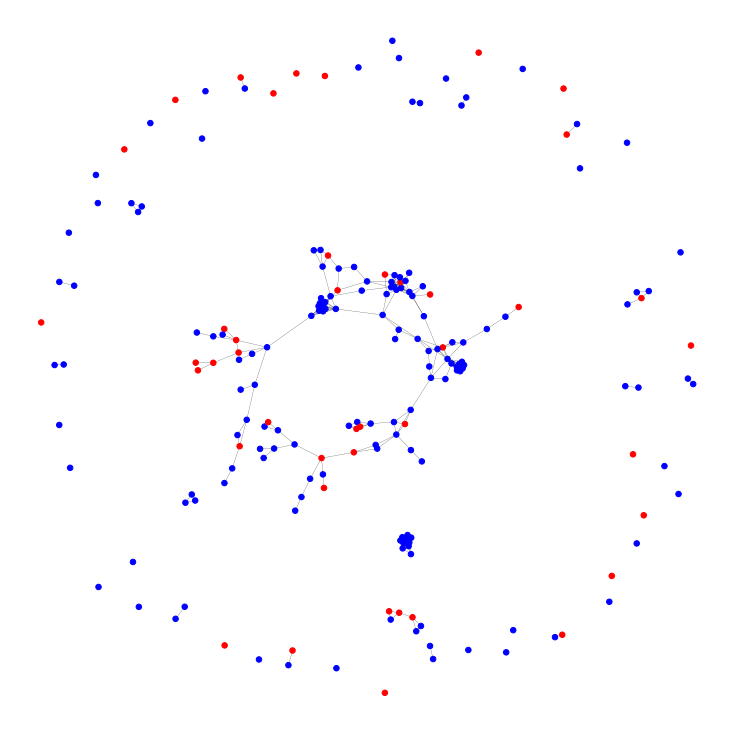

In [163]:
plt.figure(figsize=(10,10))
pos =  nx.spring_layout(subnet) 
nx.draw(subnet,pos,node_color=subnodecolor,node_size=30,width=0.2)
plt.savefig('network7degree')

In [164]:
nodearray = []
degreearray = []
for node in nx.nodes(PNet):
    nodearray.append(node)
    degreearray.append(nx.degree(PNet,node))

In [165]:
degreedf = pd.DataFrame(list(zip(nodearray,degreearray)), columns=['Provider','Degree'])

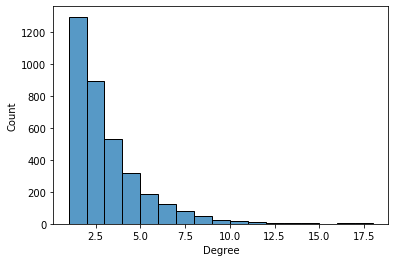

In [166]:
import seaborn as sns
sns.histplot(degreedf.Degree,binwidth=1)


In [167]:
fraudnetworkdf=pd.merge(networkdf,degreedf,'inner',on='Provider')

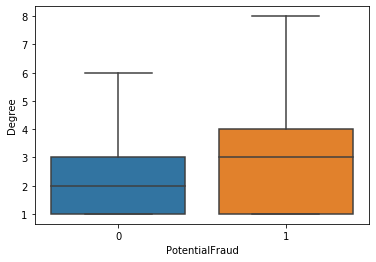

In [168]:
import seaborn as sns
sns.boxplot(x='PotentialFraud', y='Degree', data=fraudnetworkdf, showfliers=False)
plt.savefig('FraudNetworkBox')

In [169]:
# providers with at least one connection
fraudnetworkdf.groupby('PotentialFraud').count()

,Provider,Color,Degree
PotentialFraud,,,
0,3169,3169,3169
1,385,385,385


In [170]:
# providers in subnet
nodearray = []
degreearray = []
for node in nx.nodes(subnet):
    nodearray.append(node)
    degreearray.append(nx.degree(PNet,node))
degreedf = pd.DataFrame(list(zip(nodearray,degreearray)), columns=['Provider','Degree'])
fraudnetworkdf=pd.merge(networkdf,degreedf,'inner',on='Provider')
fraudnetworkdf.groupby('PotentialFraud').count()

,Provider,Color,Degree
PotentialFraud,,,
0,156,156,156
1,43,43,43


In [171]:
networkdf.groupby('PotentialFraud').count()

,Provider,Color
PotentialFraud,,
0,4904,4904
1,506,506


In [172]:
506/(506+4904)

0.09353049907578559

In [173]:
10/(38+10)

0.20833333333333334

In [174]:
385/(3169+385)

0.10832864378165448

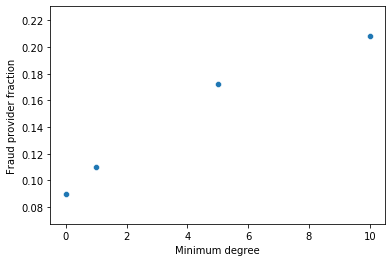

In [175]:
sns.scatterplot(x=[0, 1, 5, 10], y=[0.09, 0.11, 0.172, 0.208])
plt.xlabel('Minimum degree')
plt.ylabel('Fraud provider fraction')
plt.savefig('fraudfractionvsdegree')

In [182]:
#creat networkdegree feature
nodearray = []
degreearray = []
for node in nx.nodes(PNet):
    nodearray.append(node)
    degreearray.append(nx.degree(PNet,node))
degreedf = pd.DataFrame(list(zip(nodearray,degreearray)), columns=['Provider','Degree'])

In [183]:
fraudconnected = np.zeros(degreedf.shape[0])
fraudconnected.size


3554

In [184]:
degreedf1 = pd.merge(degreedf, networkdf, how='inner', on='Provider')[['Provider', 'Degree','PotentialFraud']]

In [185]:
# create isFraudConnected feature
for ind, node in enumerate(degreedf1.Provider):
    for neighbor in PNet.neighbors(node):
        if degreedf1.loc[degreedf1['Provider']==neighbor,'PotentialFraud'].values[0] == 1:
            fraudconnected[ind] = 1
          


In [186]:
degreedf1

,Provider,Degree,PotentialFraud
0,PRV52405,2,0
1,PRV51086,3,0
2,PRV51419,2,0
3,PRV51710,5,0
4,PRV53374,3,0
...,...,...,...
3549,PRV51173,1,1
3550,PRV56625,1,0
3551,PRV51497,1,0
3552,PRV56373,1,0


In [187]:
degreedf1['isFraudConnected'] = fraudconnected

In [188]:
networkoutputdf1 = pd.merge(degreedf1, networkdf, how='outer', on='Provider')[['Provider', 'Degree','isFraudConnected']]
networkoutputdf1.fillna(0, inplace=True)
networkoutputdf1 = networkoutputdf1.rename(columns={'Degree':"NetworkDegree"})

In [189]:
networkoutputdf1.sample(20)

,Provider,NetworkDegree,isFraudConnected
265,PRV52361,2.0,1.0
5323,PRV57490,0.0,0.0
2760,PRV57694,1.0,0.0
2563,PRV52891,1.0,0.0
3597,PRV51155,0.0,0.0
1485,PRV52247,3.0,0.0
563,PRV54566,4.0,0.0
5379,PRV57684,0.0,0.0
3779,PRV51806,0.0,0.0
2202,PRV54681,4.0,0.0


In [41]:
(providerdf.loc[providerdf.AttendingPhysician=='None',:])

,Provider,AttendingPhysician
147,PRV56253,None
335,PRV56276,None
855,PRV54894,None
868,PRV54561,None
1335,PRV54986,None
...,...,...
557049,PRV56606,None
557528,PRV52064,None
557804,PRV57104,None
557857,PRV52850,None


In [190]:
# add the number of claims having 'None' for the attending physician column
NoPhysician = np.zeros(networkoutputdf1.shape[0])
for ind, provider in enumerate(networkoutputdf1.Provider):
    NoPhysician[ind] = (providerdf.loc[providerdf.Provider==provider,'AttendingPhysician']=='None').sum()
        


In [191]:
networkoutputdf1['NoPhysicianCount'] = NoPhysician

In [192]:
NoPhysician.sum()

1508.0

In [193]:
providerdf[providerdf.AttendingPhysician=='None']

,Provider,AttendingPhysician
147,PRV56253,None
335,PRV56276,None
855,PRV54894,None
868,PRV54561,None
1335,PRV54986,None
...,...,...
557049,PRV56606,None
557528,PRV52064,None
557804,PRV57104,None
557857,PRV52850,None


In [195]:
fraudneighbor_count = np.zeros(degreedf1.shape[0])

In [194]:
degreedf1

,Provider,Degree,PotentialFraud,isFraudConnected
0,PRV52405,2,0,0.0
1,PRV51086,3,0,1.0
2,PRV51419,2,0,0.0
3,PRV51710,5,0,0.0
4,PRV53374,3,0,0.0
...,...,...,...,...
3549,PRV51173,1,1,0.0
3550,PRV56625,1,0,0.0
3551,PRV51497,1,0,0.0
3552,PRV56373,1,0,0.0


In [196]:
# create a column containing number of fraud neighbors
for ind, node in enumerate(degreedf1.Provider):
    for neighbor in PNet.neighbors(node):
        if degreedf1.loc[degreedf1['Provider']==neighbor,'PotentialFraud'].values[0] == 1:
            fraudneighbor_count[ind] = fraudneighbor_count[ind]+1
            

In [197]:
degreedf1['FraudNeighbor_Count'] = fraudneighbor_count

In [198]:
networkoutputdf1 = pd.merge(networkoutputdf1, degreedf1, how='outer', on='Provider')

In [199]:
networkoutputdf1.fillna(0, inplace=True)

In [200]:
networkoutputdf1.drop('isFraudConnected_y', inplace=True,axis=1)

In [74]:
for ind, node in enumerate(degreedf1.Provider):
    print(ind,': ',node)

0 :  PRV52405
1 :  PRV51086
2 :  PRV51419
3 :  PRV51710
4 :  PRV53374
5 :  PRV56490
6 :  PRV57341
7 :  PRV57345
8 :  PRV55396
9 :  PRV56559
10 :  PRV51868
11 :  PRV51891
12 :  PRV52120
13 :  PRV52150
14 :  PRV52038
15 :  PRV52130
16 :  PRV54644
17 :  PRV54653
18 :  PRV54384
19 :  PRV54399
20 :  PRV52985
21 :  PRV52989
22 :  PRV55165
23 :  PRV52617
24 :  PRV52689
25 :  PRV53614
26 :  PRV53635
27 :  PRV55813
28 :  PRV55687
29 :  PRV51456
30 :  PRV51336
31 :  PRV52144
32 :  PRV52152
33 :  PRV56773
34 :  PRV57054
35 :  PRV56570
36 :  PRV56668
37 :  PRV57514
38 :  PRV57548
39 :  PRV57549
40 :  PRV55510
41 :  PRV55435
42 :  PRV53269
43 :  PRV53242
44 :  PRV56647
45 :  PRV56560
46 :  PRV54675
47 :  PRV54680
48 :  PRV57406
49 :  PRV57436
50 :  PRV57415
51 :  PRV57605
52 :  PRV57523
53 :  PRV54772
54 :  PRV54723
55 :  PRV57711
56 :  PRV56896
57 :  PRV56734
58 :  PRV56583
59 :  PRV52119
60 :  PRV52019
61 :  PRV55680
62 :  PRV55755
63 :  PRV57697
64 :  PRV56574
65 :  PRV56749
66 :  PRV52199
67 : 

1062 :  PRV56624
1063 :  PRV55234
1064 :  PRV55238
1065 :  PRV53923
1066 :  PRV53938
1067 :  PRV52299
1068 :  PRV52314
1069 :  PRV55866
1070 :  PRV55826
1071 :  PRV56793
1072 :  PRV51342
1073 :  PRV51758
1074 :  PRV51447
1075 :  PRV53963
1076 :  PRV53889
1077 :  PRV57109
1078 :  PRV56638
1079 :  PRV56696
1080 :  PRV53764
1081 :  PRV53770
1082 :  PRV54207
1083 :  PRV54247
1084 :  PRV51398
1085 :  PRV51576
1086 :  PRV51436
1087 :  PRV56610
1088 :  PRV51460
1089 :  PRV54891
1090 :  PRV56018
1091 :  PRV54734
1092 :  PRV55677
1093 :  PRV56289
1094 :  PRV56258
1095 :  PRV54573
1096 :  PRV51723
1097 :  PRV51483
1098 :  PRV51729
1099 :  PRV53786
1100 :  PRV53791
1101 :  PRV55357
1102 :  PRV55177
1103 :  PRV55338
1104 :  PRV55350
1105 :  PRV55306
1106 :  PRV55304
1107 :  PRV55313
1108 :  PRV54924
1109 :  PRV54786
1110 :  PRV54748
1111 :  PRV54761
1112 :  PRV57125
1113 :  PRV57117
1114 :  PRV51910
1115 :  PRV51913
1116 :  PRV51858
1117 :  PRV51915
1118 :  PRV51911
1119 :  PRV51916
1120 :  PRV552

2492 :  PRV57056
2493 :  PRV56830
2494 :  PRV55820
2495 :  PRV55832
2496 :  PRV52996
2497 :  PRV51288
2498 :  PRV52201
2499 :  PRV52082
2500 :  PRV51679
2501 :  PRV51608
2502 :  PRV51568
2503 :  PRV54581
2504 :  PRV56477
2505 :  PRV57230
2506 :  PRV51563
2507 :  PRV51778
2508 :  PRV51551
2509 :  PRV53774
2510 :  PRV56170
2511 :  PRV56137
2512 :  PRV54301
2513 :  PRV54313
2514 :  PRV51338
2515 :  PRV53186
2516 :  PRV53150
2517 :  PRV53124
2518 :  PRV57602
2519 :  PRV55227
2520 :  PRV54106
2521 :  PRV54071
2522 :  PRV54328
2523 :  PRV52202
2524 :  PRV55909
2525 :  PRV53988
2526 :  PRV55007
2527 :  PRV54585
2528 :  PRV55091
2529 :  PRV55745
2530 :  PRV55012
2531 :  PRV54291
2532 :  PRV55505
2533 :  PRV55480
2534 :  PRV54308
2535 :  PRV52497
2536 :  PRV52500
2537 :  PRV57618
2538 :  PRV51404
2539 :  PRV55463
2540 :  PRV55556
2541 :  PRV56701
2542 :  PRV54459
2543 :  PRV54456
2544 :  PRV54442
2545 :  PRV54451
2546 :  PRV54634
2547 :  PRV56980
2548 :  PRV54865
2549 :  PRV57386
2550 :  PRV520

In [201]:
networkoutputdf1 = networkoutputdf1.rename(columns={'isFraudConnected_x':"isFraudConnected"})

In [202]:
networkoutputdf1.drop('PotentialFraud', inplace=True,axis=1)

In [203]:
networkoutputdf1.drop('Degree', inplace=True,axis=1)

In [204]:
networkoutputdf1.to_csv('networkdfnew.csv',index=False)

In [205]:
from Feature_Engineering import feature_engineering

In [206]:
features=feature_engineering(j_flag=1)

In [207]:
features.shape

(5410, 50)

In [66]:
features.to_csv('featuresnew.csv',index=False)

In [67]:
features

,Provider,Phys_Count,Patient_Count,Norm_Patient_Count,Claim_Count,Norm_Claim_Count,Service_Type,Both_Service,Inpatient,Outpatient,...,ChronicCond_Osteoporasis_2,ChronicCond_rheumatoidarthritis_1,ChronicCond_rheumatoidarthritis_2,ChronicCond_stroke_1,ChronicCond_stroke_2,PotentialFraud,NetworkDegree,isFraudConnected,NoPhysicianCount,FraudNeighbor_Count
0,PRV51001,14,24,1.71,25,1.79,Both_Service,1,0,0,...,18.0,8.0,16.0,5.0,19.0,No,2.0,0.0,0.0,0.0
1,PRV51003,44,117,2.66,132,3.00,Both_Service,1,0,0,...,89.0,32.0,85.0,9.0,108.0,Yes,1.0,0.0,0.0,0.0
2,PRV51004,38,138,3.63,149,3.92,Outpatient,0,0,1,...,95.0,41.0,97.0,16.0,122.0,No,3.0,0.0,0.0,0.0
3,PRV51005,6,495,82.50,1165,194.17,Outpatient,0,0,1,...,353.0,127.0,368.0,39.0,456.0,Yes,0.0,0.0,2.0,0.0
4,PRV51007,10,58,5.80,72,7.20,Both_Service,1,0,0,...,41.0,16.0,42.0,9.0,49.0,No,5.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,1,24,24.00,28,28.00,Outpatient,0,0,1,...,13.0,8.0,16.0,3.0,21.0,No,0.0,0.0,0.0,0.0
5406,PRV57760,3,9,3.00,22,7.33,Outpatient,0,0,1,...,5.0,1.0,8.0,0.0,9.0,No,0.0,0.0,0.0,0.0
5407,PRV57761,2,67,33.50,82,41.00,Outpatient,0,0,1,...,43.0,22.0,45.0,8.0,59.0,No,0.0,0.0,0.0,0.0
5408,PRV57762,1,1,1.00,1,1.00,Outpatient,0,0,1,...,1.0,0.0,1.0,0.0,1.0,No,0.0,0.0,0.0,0.0
